## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  64.179420  1580.986746  0.471345   9.517008   747.968490
1  86.347593  1585.445427  0.316586  10.377534   509.345286
2  85.271125  1351.592792  0.131511   5.973424   197.197171
3   7.567123  1413.093126  0.941266  10.624107  1330.251262
4  68.002978  1251.586540  0.339013   9.805970   429.653278


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0307503	total: 57.4ms	remaining: 57.3s
1:	learn: 1.0204037	total: 57.9ms	remaining: 28.9s
2:	learn: 1.0094543	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9985184	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9862397	total: 59.3ms	remaining: 11.8s
5:	learn: 0.9756131	total: 59.7ms	remaining: 9.9s
6:	learn: 0.9626830	total: 60.2ms	remaining: 8.54s
7:	learn: 0.9505219	total: 60.7ms	remaining: 7.53s
8:	learn: 0.9372412	total: 61.2ms	remaining: 6.74s
9:	learn: 0.9250882	total: 61.6ms	remaining: 6.1s
10:	learn: 0.9124686	total: 62.1ms	remaining: 5.58s
11:	learn: 0.8989121	total: 62.5ms	remaining: 5.15s
12:	learn: 0.8878157	total: 63ms	remaining: 4.78s
13:	learn: 0.8738916	total: 63.6ms	remaining: 4.48s
14:	learn: 0.8618896	total: 64ms	remaining: 4.2s
15:	learn: 0.8523758	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8411576	total: 64.9ms	remaining: 3.75s
17:	learn: 0.8337631	total: 65.3ms	remaining: 3.56s
18:	learn: 0.8256712	total: 65.7ms	remaining: 3.39s

117:	learn: 0.2610173	total: 107ms	remaining: 799ms
118:	learn: 0.2583300	total: 107ms	remaining: 796ms
119:	learn: 0.2556506	total: 108ms	remaining: 791ms
120:	learn: 0.2520470	total: 108ms	remaining: 786ms
121:	learn: 0.2498976	total: 109ms	remaining: 781ms
122:	learn: 0.2467660	total: 109ms	remaining: 777ms
123:	learn: 0.2444794	total: 109ms	remaining: 773ms
124:	learn: 0.2414270	total: 110ms	remaining: 770ms
125:	learn: 0.2386689	total: 111ms	remaining: 767ms
126:	learn: 0.2369133	total: 111ms	remaining: 762ms
127:	learn: 0.2343836	total: 111ms	remaining: 759ms
128:	learn: 0.2320192	total: 112ms	remaining: 755ms
129:	learn: 0.2297865	total: 112ms	remaining: 752ms
130:	learn: 0.2274543	total: 113ms	remaining: 748ms
131:	learn: 0.2255253	total: 113ms	remaining: 744ms
132:	learn: 0.2234733	total: 114ms	remaining: 741ms
133:	learn: 0.2212490	total: 114ms	remaining: 738ms
134:	learn: 0.2188441	total: 115ms	remaining: 734ms
135:	learn: 0.2170996	total: 115ms	remaining: 730ms
136:	learn: 

294:	learn: 0.0545288	total: 185ms	remaining: 441ms
295:	learn: 0.0541435	total: 185ms	remaining: 440ms
296:	learn: 0.0537208	total: 185ms	remaining: 439ms
297:	learn: 0.0533275	total: 186ms	remaining: 438ms
298:	learn: 0.0529776	total: 186ms	remaining: 437ms
299:	learn: 0.0525976	total: 187ms	remaining: 436ms
300:	learn: 0.0522666	total: 187ms	remaining: 435ms
301:	learn: 0.0519480	total: 188ms	remaining: 434ms
302:	learn: 0.0516083	total: 188ms	remaining: 433ms
303:	learn: 0.0512825	total: 188ms	remaining: 431ms
304:	learn: 0.0509256	total: 189ms	remaining: 430ms
305:	learn: 0.0506173	total: 189ms	remaining: 429ms
306:	learn: 0.0502948	total: 189ms	remaining: 428ms
307:	learn: 0.0499530	total: 190ms	remaining: 427ms
308:	learn: 0.0496849	total: 190ms	remaining: 426ms
309:	learn: 0.0493925	total: 191ms	remaining: 424ms
310:	learn: 0.0491033	total: 191ms	remaining: 424ms
311:	learn: 0.0488436	total: 192ms	remaining: 423ms
312:	learn: 0.0485253	total: 192ms	remaining: 422ms
313:	learn: 

538:	learn: 0.0184061	total: 288ms	remaining: 247ms
539:	learn: 0.0183553	total: 289ms	remaining: 246ms
540:	learn: 0.0182722	total: 290ms	remaining: 246ms
541:	learn: 0.0182227	total: 290ms	remaining: 245ms
542:	learn: 0.0181740	total: 290ms	remaining: 244ms
543:	learn: 0.0180922	total: 291ms	remaining: 244ms
544:	learn: 0.0180438	total: 291ms	remaining: 243ms
545:	learn: 0.0179634	total: 292ms	remaining: 242ms
546:	learn: 0.0179163	total: 292ms	remaining: 242ms
547:	learn: 0.0178371	total: 292ms	remaining: 241ms
548:	learn: 0.0177902	total: 293ms	remaining: 241ms
549:	learn: 0.0177123	total: 293ms	remaining: 240ms
550:	learn: 0.0176667	total: 294ms	remaining: 239ms
551:	learn: 0.0176213	total: 294ms	remaining: 239ms
552:	learn: 0.0175446	total: 294ms	remaining: 238ms
553:	learn: 0.0174447	total: 295ms	remaining: 237ms
554:	learn: 0.0173641	total: 295ms	remaining: 237ms
555:	learn: 0.0173197	total: 296ms	remaining: 236ms
556:	learn: 0.0172408	total: 296ms	remaining: 236ms
557:	learn: 

716:	learn: 0.0114389	total: 367ms	remaining: 145ms
717:	learn: 0.0114211	total: 368ms	remaining: 144ms
718:	learn: 0.0113866	total: 368ms	remaining: 144ms
719:	learn: 0.0113701	total: 368ms	remaining: 143ms
720:	learn: 0.0113209	total: 369ms	remaining: 143ms
721:	learn: 0.0113039	total: 369ms	remaining: 142ms
722:	learn: 0.0112909	total: 370ms	remaining: 142ms
723:	learn: 0.0112584	total: 370ms	remaining: 141ms
724:	learn: 0.0112418	total: 371ms	remaining: 141ms
725:	learn: 0.0112291	total: 371ms	remaining: 140ms
726:	learn: 0.0112064	total: 371ms	remaining: 139ms
727:	learn: 0.0111903	total: 372ms	remaining: 139ms
728:	learn: 0.0111679	total: 372ms	remaining: 138ms
729:	learn: 0.0111450	total: 373ms	remaining: 138ms
730:	learn: 0.0111137	total: 373ms	remaining: 137ms
731:	learn: 0.0110705	total: 374ms	remaining: 137ms
732:	learn: 0.0110502	total: 374ms	remaining: 136ms
733:	learn: 0.0110031	total: 374ms	remaining: 136ms
734:	learn: 0.0109868	total: 375ms	remaining: 135ms
735:	learn: 

954:	learn: 0.0060527	total: 471ms	remaining: 22.2ms
955:	learn: 0.0060275	total: 472ms	remaining: 21.7ms
956:	learn: 0.0060116	total: 472ms	remaining: 21.2ms
957:	learn: 0.0059975	total: 473ms	remaining: 20.7ms
958:	learn: 0.0059836	total: 473ms	remaining: 20.2ms
959:	learn: 0.0059734	total: 473ms	remaining: 19.7ms
960:	learn: 0.0059597	total: 474ms	remaining: 19.2ms
961:	learn: 0.0059462	total: 474ms	remaining: 18.7ms
962:	learn: 0.0059331	total: 475ms	remaining: 18.2ms
963:	learn: 0.0059135	total: 475ms	remaining: 17.8ms
964:	learn: 0.0058981	total: 476ms	remaining: 17.3ms
965:	learn: 0.0058829	total: 476ms	remaining: 16.8ms
966:	learn: 0.0058729	total: 477ms	remaining: 16.3ms
967:	learn: 0.0058588	total: 477ms	remaining: 15.8ms
968:	learn: 0.0058432	total: 478ms	remaining: 15.3ms
969:	learn: 0.0058278	total: 478ms	remaining: 14.8ms
970:	learn: 0.0058113	total: 479ms	remaining: 14.3ms
971:	learn: 0.0057968	total: 479ms	remaining: 13.8ms
972:	learn: 0.0057820	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

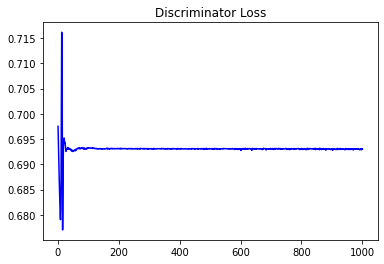

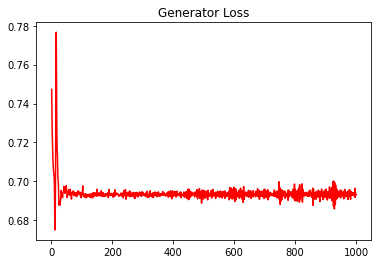

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005819283541818056


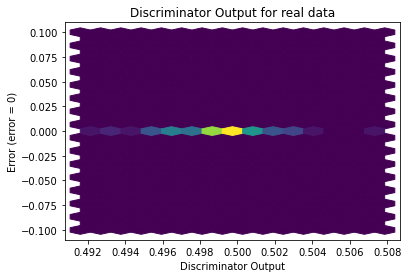

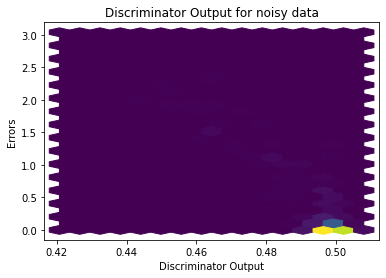

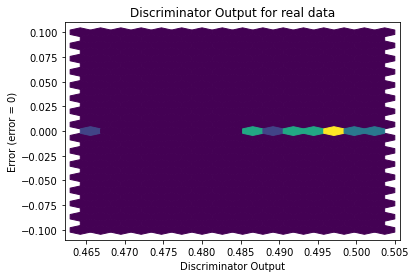

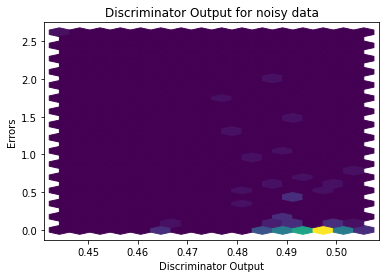

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


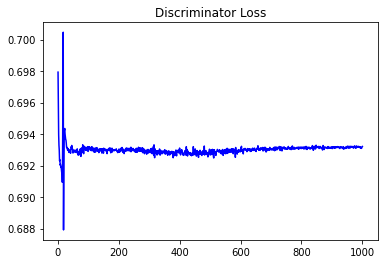

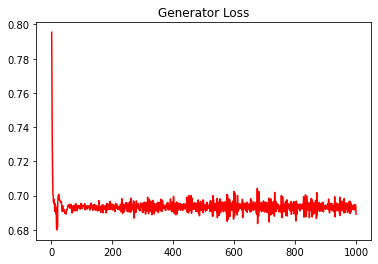

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.010199141322581814


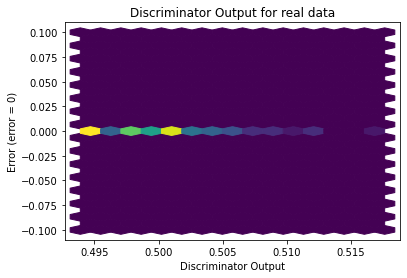

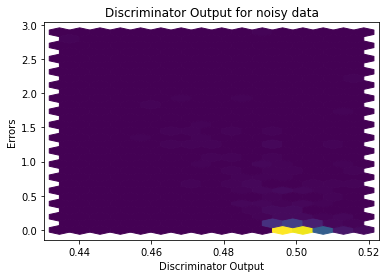

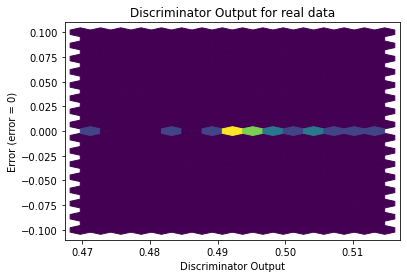

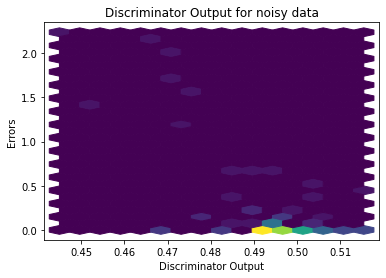

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0730]], requires_grad=True)
